<a href="https://colab.research.google.com/github/ankitgarg1999/newGit/blob/main/Linear_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Perceptron**
This learns a linear classifier that can work for only a lineraly separable data. It learns the classifier using perceptron learning algorithm. 

In [1]:
# read data from data.csv file
import pandas as pd
import torch
data = pd.read_csv('data.csv')
data = data.to_numpy()
x = data[:,:2]
y = data[:,2]
x = torch.from_numpy(x)
y = torch.from_numpy(y)

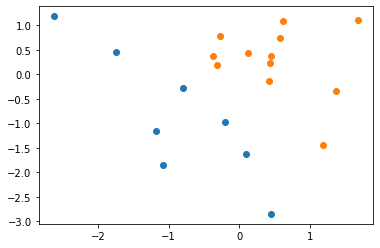

In [2]:
# visualize the data that you want to classify
import matplotlib.pyplot as plt
x1 = [[x[i][0].item(),x[i][1].item()] for i in range(0,20) if y[i] == 1]
x2 = [[x[i][0].item(),x[i][1].item()] for i in range(0,20) if y[i] == -1]
x1 = torch.tensor(x1)
x2 = torch.tensor(x2)
plt.scatter(x1[:,0],x1[:,1])
plt.scatter(x2[:,0],x2[:,1])

In [3]:
# initialize the weight vector to all zero
w = torch.zeros(3,1)

In [4]:
# function to plot the classifier learnt
def plot(w):
  x_range = [-2, -1, 0, 1, 2]
  y_range = []
  for i in range (0,len(x_range)):
    if w[1] == 0:
      y_range.append(0)
    else :
      y_range.append((-w[2] - x_range[i]*w[0])/w[1])
  plt.plot(x_range,y_range)
  plt.scatter(x1[:,0],x1[:,1])
  plt.scatter(x2[:,0],x2[:,1])
  plt.show()

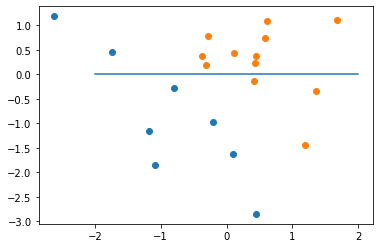

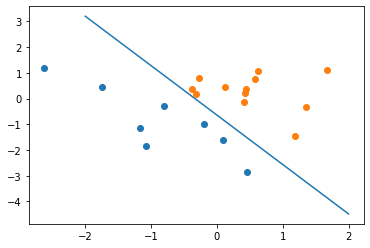

In [5]:
# iterate through the whole data and learn perceptron
alpha = 0.1
plot(w)

for k in range(0,2):
  for i in range(0,20):
    x_temp = torch.tensor([[x[i][0].float()],[x[i][1].float()],[1]])
    y_temp = y[i]
    y_pred = (torch.matmul(torch.transpose(w,0,1),x_temp)).item()

    # check if the current example is misclassified or not
    if (y_temp*y_pred >0):
      continue
    else:
      if y_pred>=0 :
        w = w - alpha*x_temp
      else: 
        w = w + alpha*x_temp

plot(w)

In [6]:
print(w)

tensor([[-0.2989],
        [-0.1555],
        [-0.1000]])


The equation of the classifier learnt is `f(x) = -0.2989x1 -0.1555x2 - 0.1000`. `f(x) > 0` for all points for which `y = 1 `and `f(x) < 0` for all points which `y = -1`